### Welcome to my first Python data science project

Dataset for this project can be accessed on Kaggle.com

### Loading the required Libraries

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the Dataset

In [3]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dataset column names description
1. PassengerId: Uniquesly identify each passenger
2. Survived: Indicate whether a passenger survive or not {0: not survived, 1: survived}
3. Pclass: Passenger class {1, 2, 3}
4. Name: Name of passengers aboard
5. Sex: Sex of passengers aboard
6. Age: Age of passengers aboard
7. SIbSp: Siblings {1: means have a sibling, 0: no sibling}
8. Parch: Parent/Child {0: no parent/child, 1: parent/child}
9. Ticket: passenger's ticket
10. Fare: Ticketfare based on the passengers class
11. Cabin: Cabin aboard
12. Embarked: Location of passengers-where they came from

### This Data Analysis project aimed to identify various factors that influenced the survival rate of pasengers aboard Titanic is guided by the following questions.
1. Who were the passengers aboard?
2. What factors influenced the survival rate of passengers aboard the Titanic?
3. What deck were the passengers on and how does that relate to their class?
4. Did socioeconomic status play a role in survival of passengers?
5. Were there any demographic groups that were disproportionately affected by the disaster?
6. How many passengers were alone and how many were with a child/parent

#### Data cleaning

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

In [7]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
titanic.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Who were the passengers aboard?

In [15]:
sns.countplot('Sex', data=titanic)
plt.title('Sex of passengers')

C:\Users\Beam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

C:\Users\Beam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sex of passengers based on their classes')

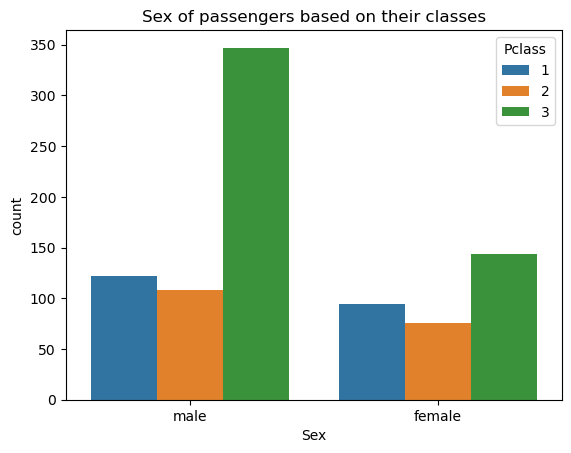

In [29]:
sns.countplot('Sex', data=titanic, hue='Pclass')
plt.title('Sex of passengers based on their classes')

C:\Users\Beam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Passengers class based on Sex')

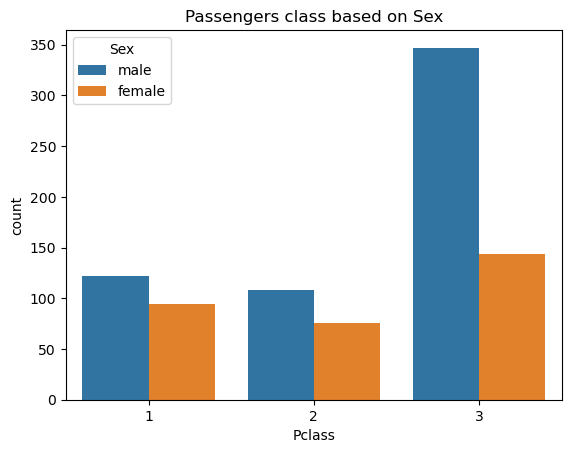

In [31]:
sns.countplot('Pclass', data=titanic, hue='Sex')
plt.title('Passengers class based on Sex')

C:\Users\Beam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

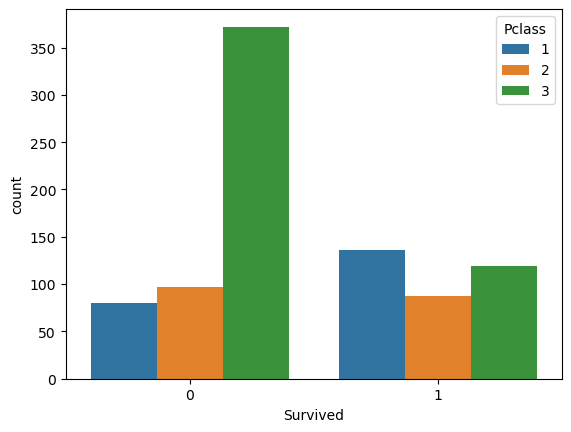

In [33]:
sns.countplot('Survived', data=titanic, hue='Pclass')

In [34]:
titanic.groupby('Pclass').Survived.sum().sort_values(ascending=False).head()

Pclass
1    136
3    119
2     87
Name: Survived, dtype: int64

### Insights:
1. The mean age of passengers was 30 years and the mean fare was $32.20. The oldest passenger was 80 years old.
2. They were more male passengers than female passengers aboard. Also, more than half of the passengers who were male 
    were also in the 3rd class. 1st and 2nd class had proportionate number of males while out of total passengers who were 
    female, nearly 150 were in the 3rd class.
3. Out of total passengers who did not survive, majority were in the 3rd class. For those who did survive, quite a good 
    number are in 1st and 3rd classes.

### What factors influenced the survival rate of passengers aboard the Titanic?

In [35]:
# Age as a factor
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\Beam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bar chart of Survivals')

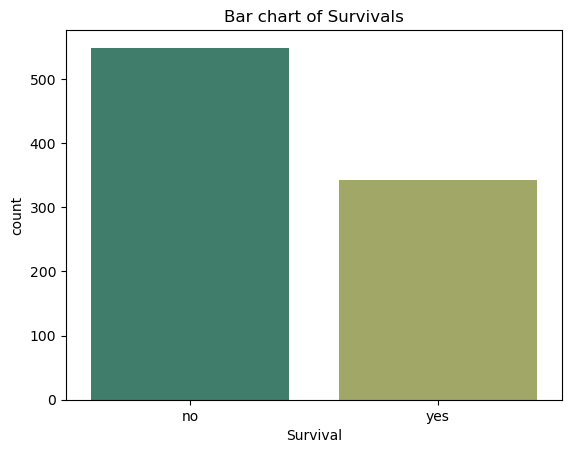

In [38]:
titanic['Survival'] = titanic.Survived.map({0: 'no', 1: 'yes'})
sns.countplot('Survival', data=titanic, palette='gist_earth')
plt.title('Bar chart of Survivals')

C:\Users\Beam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Survived'>

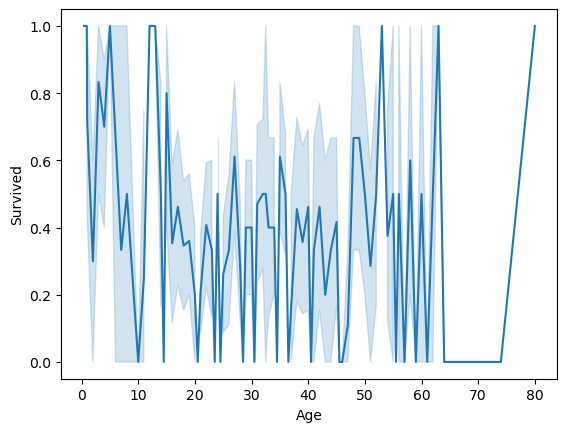

In [67]:
sns.lineplot('Age', 'Survived', data=titanic, palette='ocean')

C:\Users\Beam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


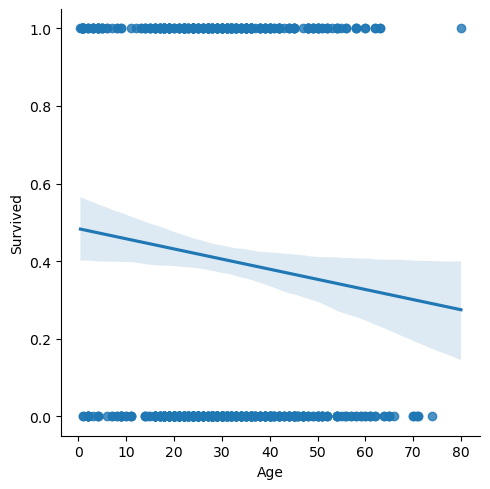

In [48]:
sns.lmplot('Age', 'Survived', data=titanic)

C:\Users\Beam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relationship between Age and Survived based on class')

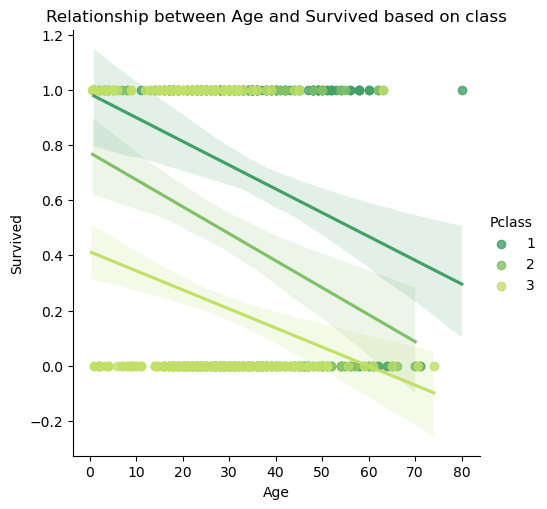

In [52]:
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic, palette='summer')
plt.title('Relationship between Age and Survived based on class')

C:\Users\Beam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


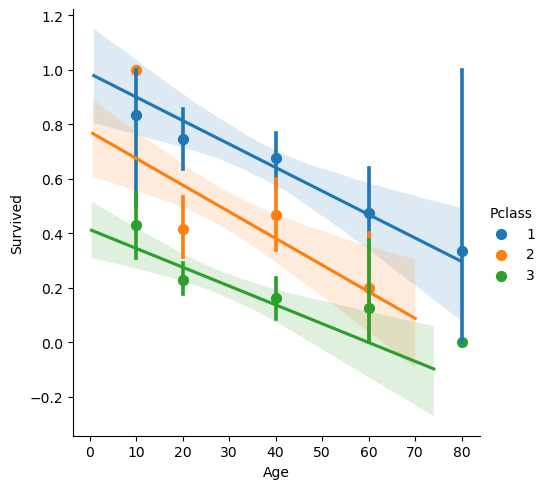

In [53]:
age_groups = [10, 20, 40, 60, 80]

sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic, x_bins=age_groups)

C:\Users\Beam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


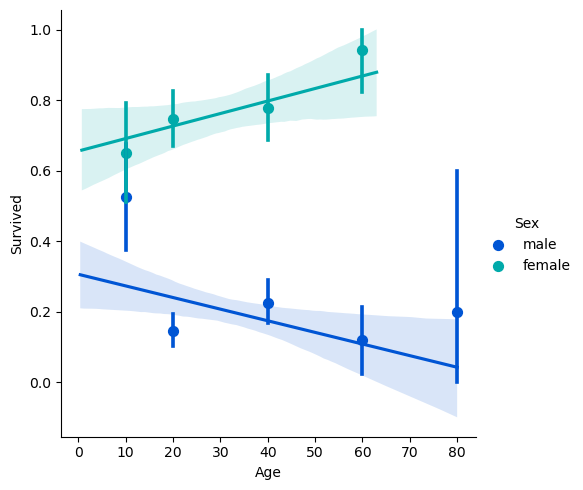

In [54]:
## ge and sex
sns.lmplot('Age', 'Survived', hue='Sex', palette='winter', data=titanic, x_bins=age_groups)

### Insights:
1. Age and Survival has no linear relationship between them. However, older passengers may have reduced chances of 
    survival than median age passengers.
2. Also, first class passengers had higher chances of survival than passengers in the rest of the class.
3. 3rd class passengers had lower chances of survival
4. Overall, females had higher chances of survival than males. This because majority of the males were in the 3rd class 
    with lower chances of survival.

### What deck were the passengers on and how does that relate to their class?

In [68]:
# Let's examine the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no


In [71]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survival         0
dtype: int64

In [73]:
deck = titanic['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

C:\Users\Beam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin', ylabel='count'>

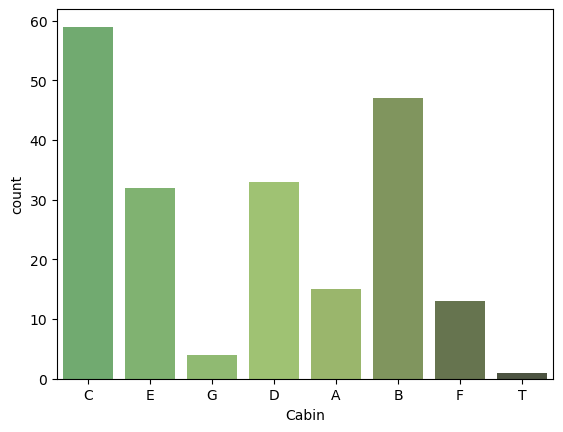

In [77]:
# create an empty list
deck_levels = []
for level in deck:
    deck_levels.append(level[0])
cabin_new = DataFrame(deck_levels)
cabin_new.columns = ['Cabin']

sns.countplot('Cabin', data=cabin_new, palette='summer_d')

C:\Users\Beam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Plot of passengers in each Cabin')

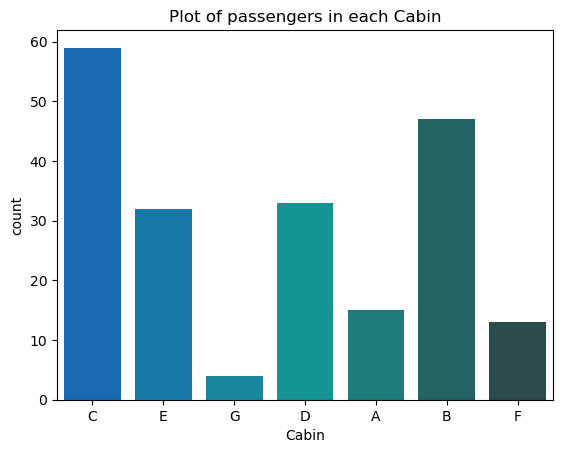

In [80]:
cabin_new = cabin_new[cabin_new.Cabin != 'T']
sns.countplot('Cabin', data=cabin_new, palette='winter_d')
plt.title('Plot of passengers in each Cabin')

C:\Users\Beam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Passengers Embarked based on their class')

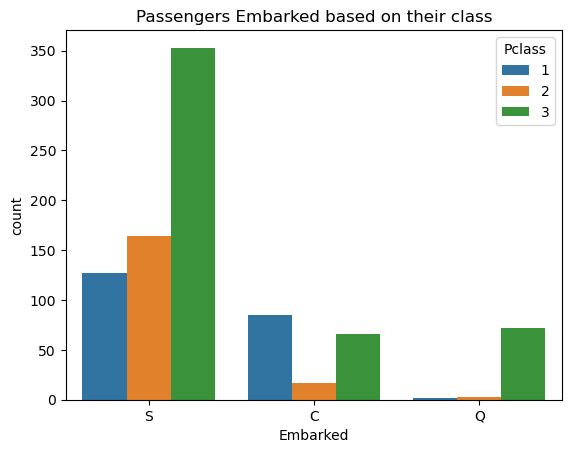

In [178]:
sns.countplot('Embarked', hue='Pclass', data=titanic)
plt.title('Passengers Embarked based on their class')

### Insights:
1. The cabin 'T' was identified as possible outlier and dropped from the data.
2. passengers are grouped into various cabins. Cabin 'C' has the higest number of passengers,accounting for almost 
    60% followed  by cabin 'B' with +40 passengers. Cabins 'E' and 'D' has almost equal number of passengers (+30), cabins 
    'A' and 'F' has alomost equal number of passengers (<20 each) and 'G' has the lowest number of passengers accounting 
    for less than 10 of the total.
3. Morethan 90% of the passenger in 3rd class came from Southhampton

C:\Users\Beam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

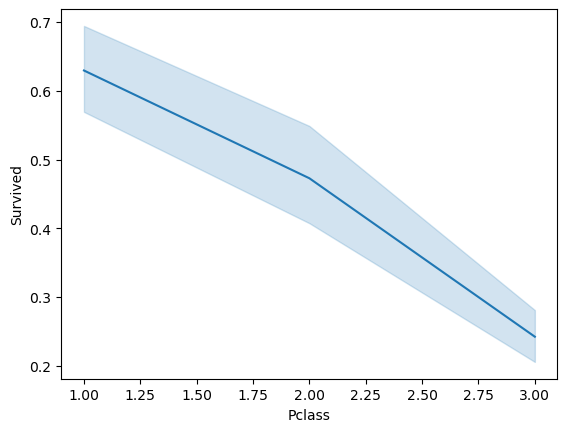

In [96]:
sns.lineplot('Pclass', 'Survived', data=titanic)


### Insights:
Social economic status plays a vital role in survival of passengers. This means that first class passengers had good survival rate compared to passengers in the 3rd class with high probability of survival rates.

### How many passengers were alone and how many were with a child/parent?

In [97]:
# Lets define a function that will help us to know children aboard

def male_female_child(passenger):
    sex, age = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [98]:
# create a new column and apply the function

titanic['Person'] = titanic[['Sex', 'Age']].apply(male_female_child, axis=1)
titanic[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,no,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,yes,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,yes,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,no,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,no,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,no,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,yes,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,yes,child


C:\Users\Beam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Passengers Class based on Person (Male, Female, Child)')

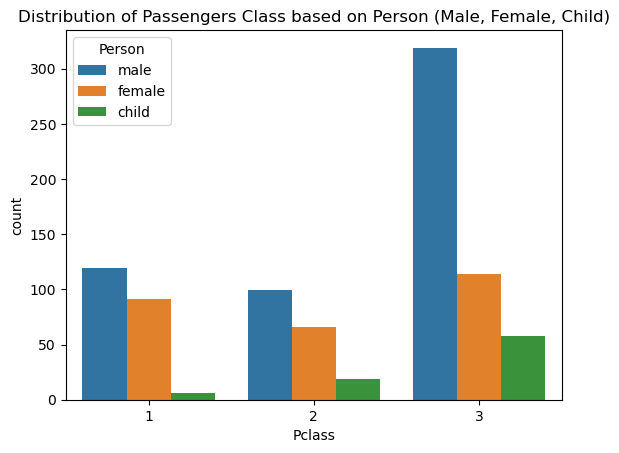

In [165]:
sns.countplot('Pclass', data=titanic, hue='Person')
plt.title('Distribution of Passengers Class based on Person (Male, Female, Child)')

In [122]:
titanic.groupby('Person').Survival.count()

Person
child      83
female    271
male      537
Name: Survival, dtype: int64

Text(0.5, 1.0, 'Age distribution of passengers')

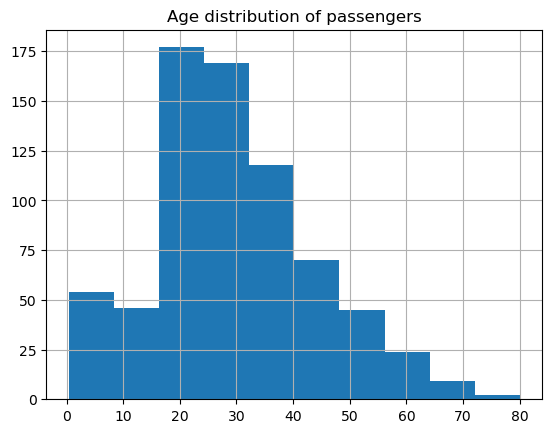

In [107]:
titanic['Age'].hist()
plt.title('Age distribution of passengers')

Text(0.5, 1.0, 'Kde plot of age based on sex')

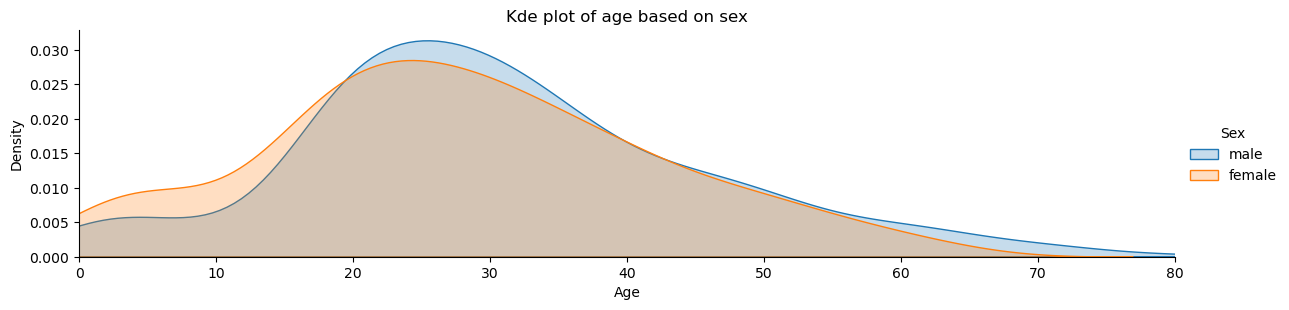

In [117]:
# creating kde plot for age

fig = sns.FacetGrid(data=titanic, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest_passenger = titanic['Age'].max()

fig.set(xlim=(0, oldest_passenger))
fig.add_legend()
plt.title('Kde plot of age based on sex')

Text(0.5, 1.0, 'Kde plot of age based on Person')

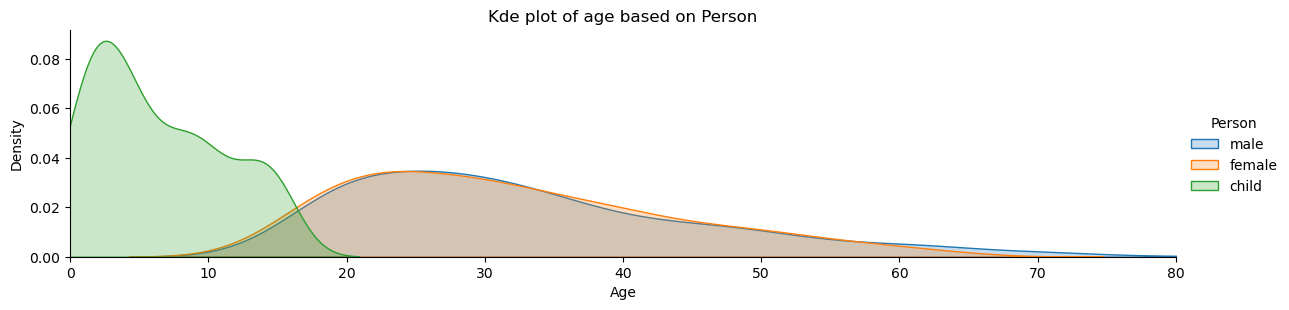

In [166]:
fig = sns.FacetGrid(data=titanic, hue='Person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest_passenger = titanic['Age'].max()

fig.set(xlim=(0, oldest_passenger))
fig.add_legend()
plt.title('Kde plot of age based on Person')

Text(0.5, 1.0, 'Kde plot of age based on Passengers class')

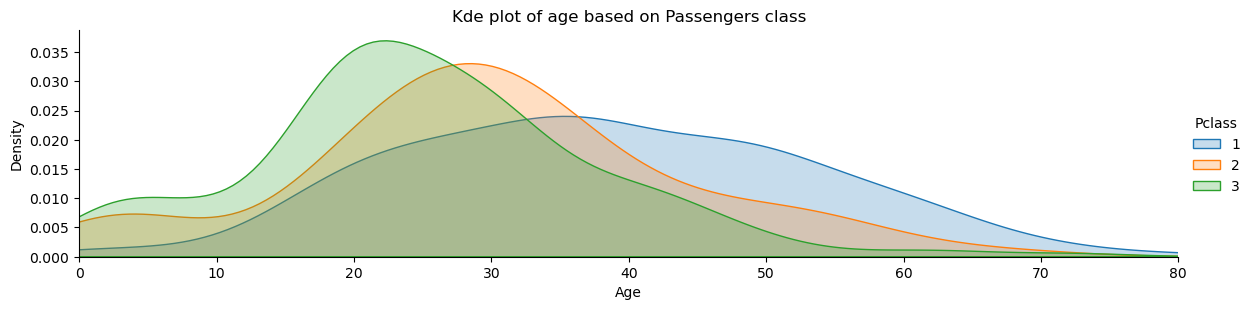

In [123]:
fig = sns.FacetGrid(data=titanic, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest_passenger = titanic['Age'].max()

fig.set(xlim=(0, oldest_passenger))
fig.add_legend()
plt.title('Kde plot of age based on Passengers class')

In [124]:
# Let's create a new column and name it family support
titanic['FamilySupport'] = titanic.SibSp + titanic.Parch
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Person,FamilySupport
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,no,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,yes,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yes,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,yes,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no,male,0


In [127]:
titanic['FamilySupport']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: FamilySupport, Length: 891, dtype: int64

In [173]:
titanic.groupby('FamilySupport').sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
FamilySupport,,,,,,,
Alone,245946,163,1289,13017.00,0,0,11407.3238
with family,151440,179,768,8188.17,466,340,17286.6255


C:\Users\Beam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of passengers who were alone vs those with at least a family member')

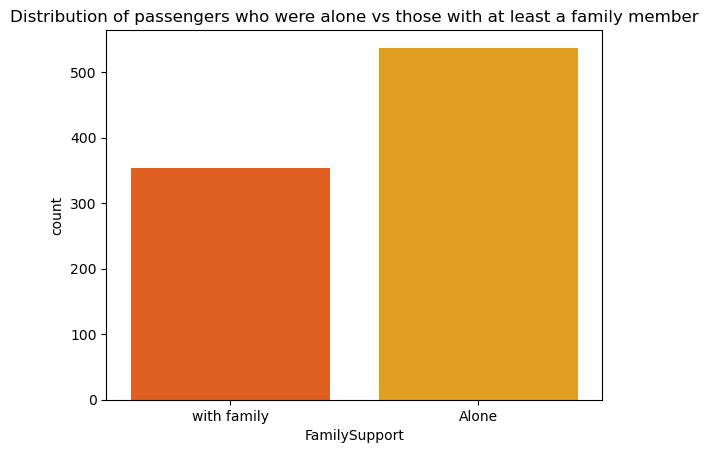

In [167]:
sns.countplot('FamilySupport', data=titanic, palette='autumn')
plt.title('Distribution of passengers who were alone vs those with at least a family member')

<AxesSubplot:xlabel='FamilySupport', ylabel='count'>

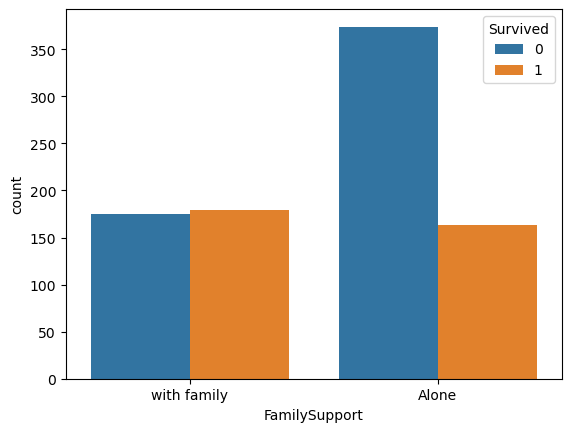

In [169]:
sns.countplot('FamilySupport', hue='Survived', data=titanic)

C:\Users\Beam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

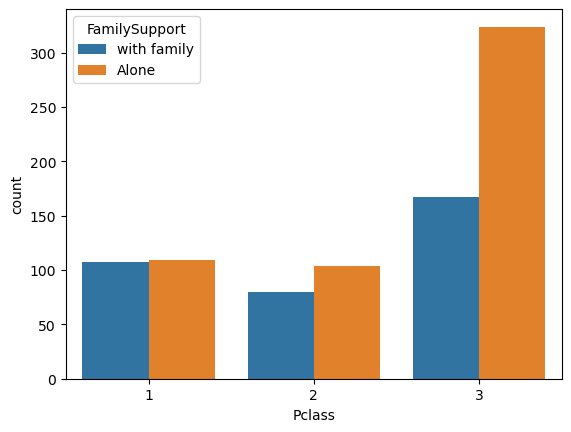

In [171]:
sns.countplot('Pclass', hue='FamilySupport', data=titanic)

### Insights:
1. A column named Person was created to include passengers who were less than 16 years of age and are labelled 
    'child', and males and females.
2. The distribution of passengers based on whether they are males, females, or child indicates that 3rd class passengers
    had more children aboard than 1st class and the 2nd class. This account for 50 out of the  total of 
    83 passengers identified as children (age < 16) and 1st class passengers had the least number of children.
3. The Kernel Distribution Estimation (KDE) plot of age based on sex indicates that both males and females ages follows a 
    right skewed distribution. This means more than half ofthe ages fall aboe the mean age.
4. Also, considering the KDE plot of age based on the passengers class, the results shows that 1st class passengers has an 
    age distribution that is symmetrical inshape (most normally distributed), while 2nd class passengers has
    an age distribution almost skewed to the righ, and 3rd class passengers has a left skewed distribution respectively.
5. Out of the total number of passengers who survived, 163 were alone while 179 were with at least a family  member
    or relative.
6. Those who did not survive and were alone were twice morethan those who were with at least a family member in 3rd class 
    but almost equal proportion in 1st class.
7. Out of the total number of passengers aboard, those who were alone (no family member, friend or relative) were more 
    than those who were with at least one family member or relative.

## Conclusions
1. Socio-economic status has significant infuence on the survival of passengers.
2. Females had higher chances of survival than male passengers as majority of them were 1st class passengers. This maybe because female passengers were prioritized and majority had one or two children. This also explains the reason why majority of the passengers in the 3rd class were males.
3. Majority of the passengers were on Deck or Cabin 'C'
4. 1st class passengers had age distribution that is normally distributed
5. More than 90% of the passengers in the 3rd class came from Southhampton.
